=== PHASE 1: DATENVERSTÄNDNIS & ÜBERBLICK ===
Autor: MTR Anycast Routing Analyse
Datum: 2025-06-21 15:25:40

1. DATEN LADEN...
------------------------------
✓ IPv4 Daten geladen: 160,923 Zeilen, 10 Spalten
✓ IPv6 Daten geladen: 160,923 Zeilen, 10 Spalten

2. DATENSTRUKTUR - IPv4
----------------------------------------
Spalten:
  - id: object
  - utctime: datetime64[ns]
  - bitpattern: object
  - src: object
  - psize: int32
  - dst: object
  - tos: int32
  - tests: int32
  - region: object
  - hubs: object

Speicherverbrauch: 74.89 MB
Zeitraum: 2025-05-27 12:59:06.053865 bis 2025-06-20 14:31:15.563100

Eindeutige Werte:
  - src: 2510 eindeutige Werte
  - dst: 7 eindeutige Werte
    ['1.1.1.1', '104.16.123.96', '169.229.128.134', '193.99.144.85', '2.16.241.219', '8.8.8.8', '9.9.9.9']
  - region: 10 eindeutige Werte
    ['af-south-1', 'ap-east-1', 'ap-northeast-1', 'ap-south-1', 'ap-southeast-2', 'ca-central-1', 'eu-central-1', 'eu-north-1', 'sa-east-1', 'us-west-1']

2. DATENSTRUKTUR 

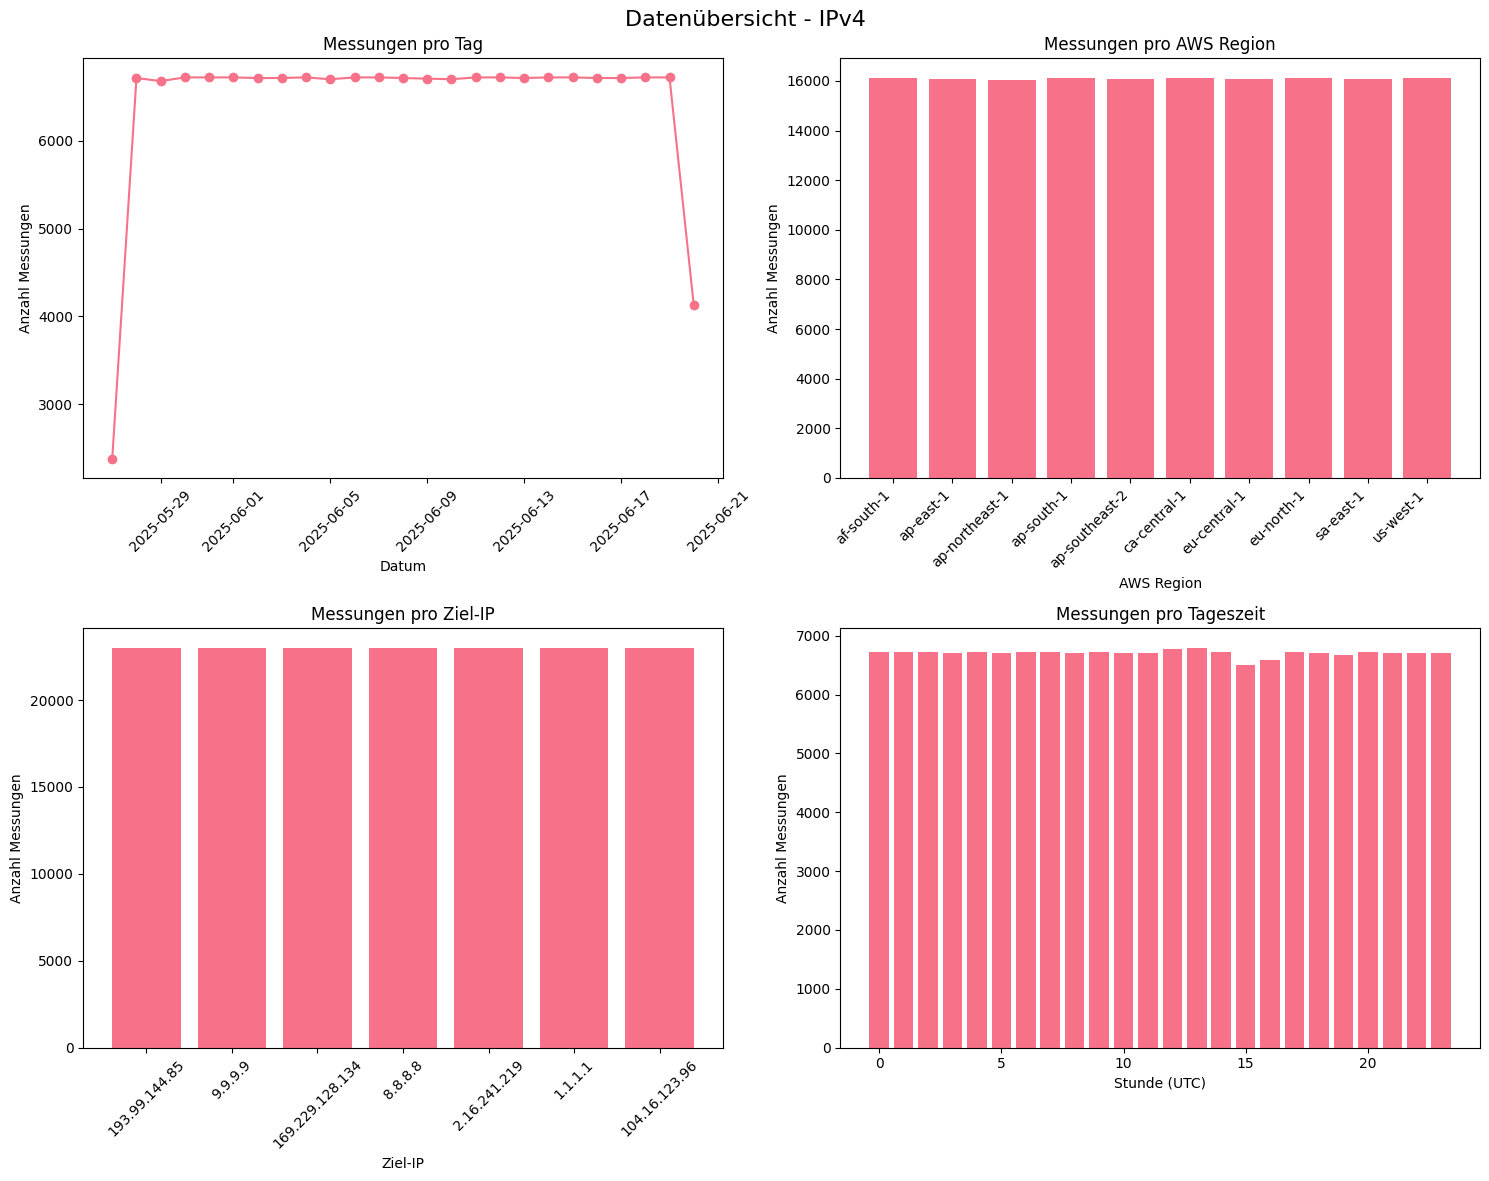


5. ERSTE VISUALISIERUNGEN - IPv6
----------------------------------------


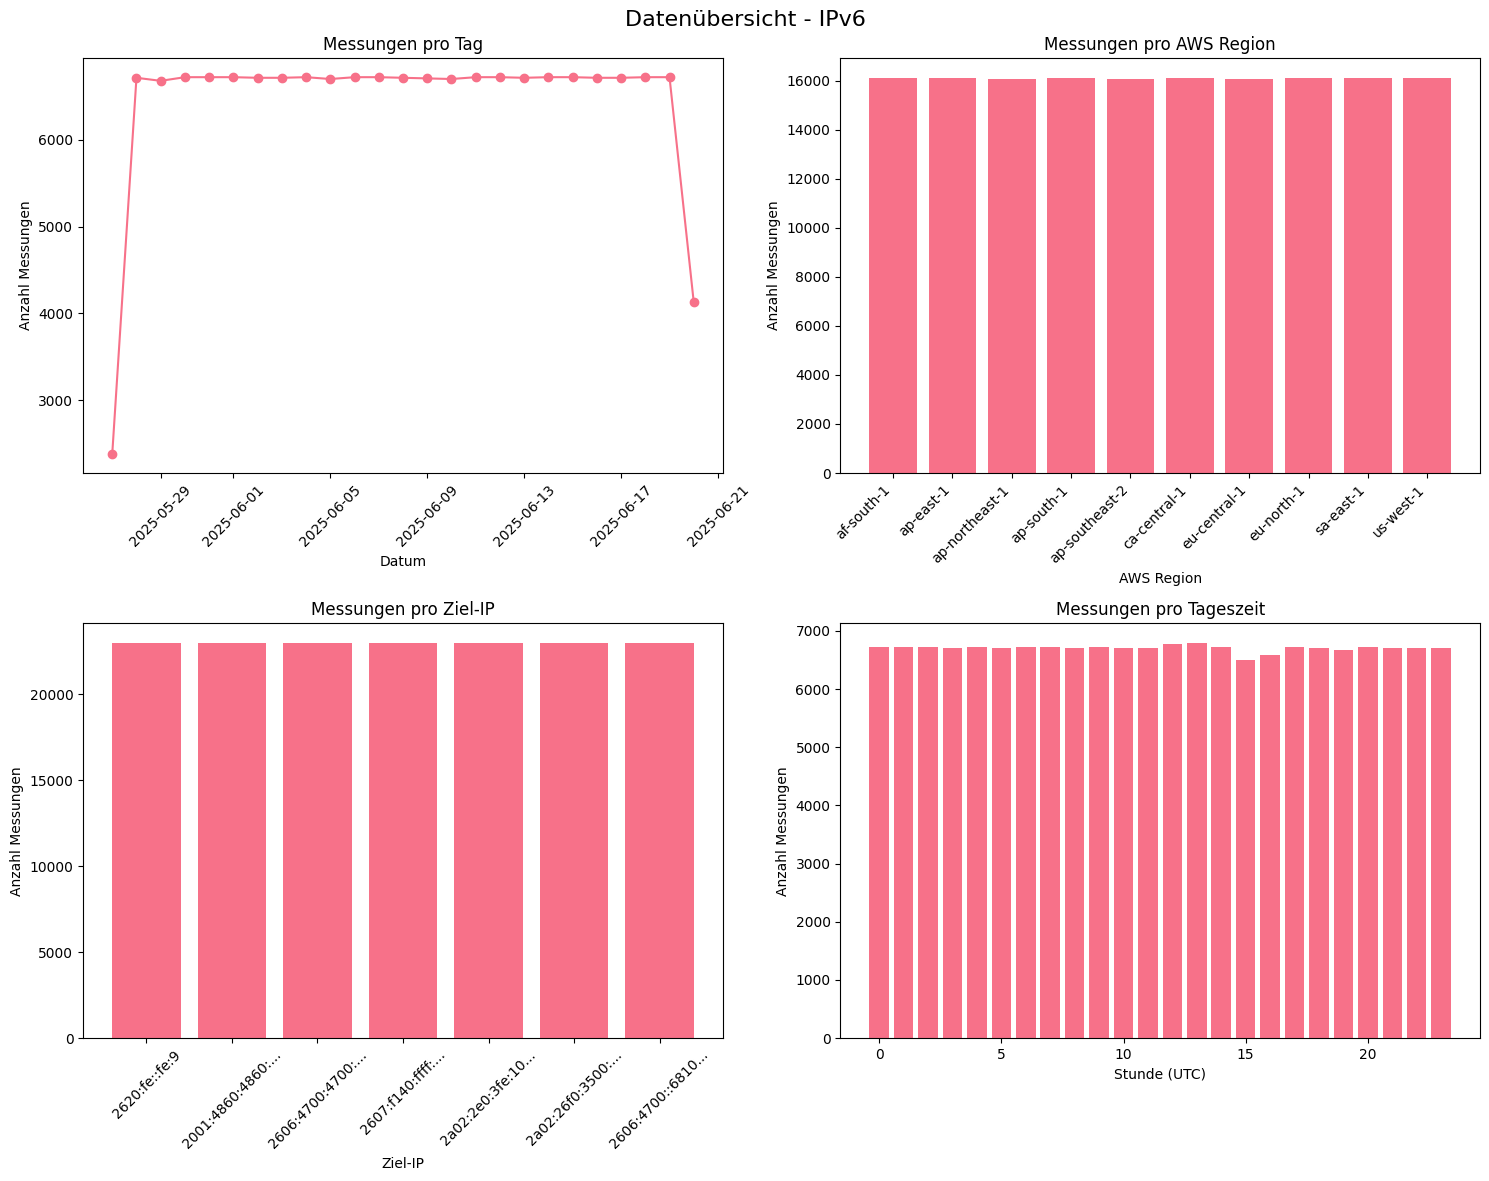


6. HUBS-DATEN EXPLORATION - IPv4
----------------------------------------
Beispiel Hub-Struktur:
Verfügbare Metriken pro Hub:
  - Loss%: 0.0
  - Rcv: 5
  - Jint: 149.7
  - count: 1
  - Jttr: 110.98
  - Javg: 31.499
  - Drop: 0
  - Last: 113.01
  - Avg: 34.936
  - StDev: 47.718
  - Wrst: 113.01
  - Gmean: 11.952
  - host: ec2-52-60-0-83.ca-central-1.compute.amazonaws.com (52.60.0.83)
  - Snt: 5
  - Jmax: 110.98
  - Best: 2.028
  - ASN: AS16509
  Verarbeitet: 1,000 Zeilen...
  Verarbeitet: 2,000 Zeilen...
  Verarbeitet: 3,000 Zeilen...
  Verarbeitet: 4,000 Zeilen...
  Verarbeitet: 5,000 Zeilen...
  Verarbeitet: 6,000 Zeilen...
  Verarbeitet: 7,000 Zeilen...
  Verarbeitet: 8,000 Zeilen...
  Verarbeitet: 9,000 Zeilen...
  Verarbeitet: 10,000 Zeilen...
  Verarbeitet: 11,000 Zeilen...
  Verarbeitet: 12,000 Zeilen...
  Verarbeitet: 13,000 Zeilen...
  Verarbeitet: 14,000 Zeilen...
  Verarbeitet: 15,000 Zeilen...
  Verarbeitet: 16,000 Zeilen...
  Verarbeitet: 17,000 Zeilen...
  Verarbeitet: 18

In [1]:
# Phase 1: Datenverständnis & Überblick - MTR Anycast Analyse
# ================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Für größere Dateien optional PySpark
# from pyspark.sql import SparkSession
# from pyspark.sql.functions import *

# Konfiguration für bessere Plots
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("=== PHASE 1: DATENVERSTÄNDNIS & ÜBERBLICK ===")
print("Autor: MTR Anycast Routing Analyse")
print("Datum:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print("="*60)

# ================================================================
# 1. DATEN LADEN UND ERSTE INSPEKTION
# ================================================================

# Pfade zu Ihren Parquet Files anpassen
IPv4_FILE = "../data/IPv4.parquet"  # Bitte anpassen
IPv6_FILE = "../data/IPv6.parquet"  # Bitte anpassen

print("\n1. DATEN LADEN...")
print("-" * 30)

# IPv4 Daten laden
try:
    df_ipv4 = pd.read_parquet(IPv4_FILE)
    print(f"✓ IPv4 Daten geladen: {df_ipv4.shape[0]:,} Zeilen, {df_ipv4.shape[1]} Spalten")
except Exception as e:
    print(f"✗ Fehler beim Laden der IPv4 Daten: {e}")
    df_ipv4 = None

# IPv6 Daten laden  
try:
    df_ipv6 = pd.read_parquet(IPv6_FILE)
    print(f"✓ IPv6 Daten geladen: {df_ipv6.shape[0]:,} Zeilen, {df_ipv6.shape[1]} Spalten")
except Exception as e:
    print(f"✗ Fehler beim Laden der IPv6 Daten: {e}")
    df_ipv6 = None

# ================================================================
# 2. DATENSTRUKTUR ANALYSIEREN
# ================================================================

def analyze_dataframe_structure(df, name):
    """Analysiert die Struktur eines DataFrames"""
    print(f"\n2. DATENSTRUKTUR - {name}")
    print("-" * 40)
    
    print("Spalten:")
    for col in df.columns:
        print(f"  - {col}: {df[col].dtype}")
    
    print(f"\nSpeicherverbrauch: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    print(f"Zeitraum: {df['utctime'].min()} bis {df['utctime'].max()}")
    
    # Eindeutige Werte in Schlüsselspalten
    print("\nEindeutige Werte:")
    key_columns = ['src', 'dst', 'region']
    for col in key_columns:
        if col in df.columns:
            unique_count = df[col].nunique()
            print(f"  - {col}: {unique_count} eindeutige Werte")
            if unique_count <= 20:  # Zeige Werte wenn nicht zu viele
                print(f"    {sorted(df[col].unique())}")

if df_ipv4 is not None:
    analyze_dataframe_structure(df_ipv4, "IPv4")

if df_ipv6 is not None:
    analyze_dataframe_structure(df_ipv6, "IPv6")

# ================================================================
# 3. DATENQUALITÄT PRÜFEN
# ================================================================

def check_data_quality(df, name):
    """Prüft die Datenqualität"""
    print(f"\n3. DATENQUALITÄT - {name}")
    print("-" * 40)
    
    # Fehlende Werte
    missing_data = df.isnull().sum()
    if missing_data.sum() > 0:
        print("Fehlende Werte:")
        for col, missing in missing_data[missing_data > 0].items():
            print(f"  - {col}: {missing:,} ({missing/len(df)*100:.2f}%)")
    else:
        print("✓ Keine fehlenden Werte in Hauptspalten")
    
    # Duplikate prüfen - nur auf hashable Spalten
    # Ausschluss der 'hubs' Spalte da sie numpy arrays enthält
    hashable_columns = [col for col in df.columns if col != 'hubs']
    try:
        duplicates = df[hashable_columns].duplicated().sum()
        print(f"Duplikate (ohne hubs): {duplicates:,} ({duplicates/len(df)*100:.2f}%)")
    except Exception as e:
        print(f"Duplikate-Prüfung fehlgeschlagen: {e}")
        print("Prüfe Duplikate auf Basis von ID und Zeitstempel...")
        if 'id' in df.columns:
            id_duplicates = df['id'].duplicated().sum()
            print(f"ID-Duplikate: {id_duplicates:,}")
    
    # Zeitlücken identifizieren
    df_time_sorted = df.sort_values('utctime')
    time_diffs = df_time_sorted['utctime'].diff()
    
    # Erwartete Messintervalle (15 Minuten = 900 Sekunden)
    expected_interval = timedelta(minutes=15)
    large_gaps = time_diffs > expected_interval * 2  # Größer als 30 Minuten
    
    print(f"Große Zeitlücken (>30min): {large_gaps.sum():,}")
    if large_gaps.sum() > 0:
        print("Größte Lücken:")
        largest_gaps = time_diffs[large_gaps].nlargest(5)
        for gap in largest_gaps:
            print(f"  - {gap}")

if df_ipv4 is not None:
    check_data_quality(df_ipv4, "IPv4")

if df_ipv6 is not None:
    check_data_quality(df_ipv6, "IPv6")

# ================================================================
# 4. GRUNDLEGENDE STATISTIKEN
# ================================================================

def basic_statistics(df, name):
    """Erstellt grundlegende Statistiken"""
    print(f"\n4. GRUNDSTATISTIKEN - {name}")
    print("-" * 40)
    
    # Messungen pro AWS Region (gruppiert)
    measurements_per_region = df['region'].value_counts().sort_index()
    print("Messungen pro AWS Region:")
    for region, count in measurements_per_region.items():
        print(f"  - {region}: {count:,}")
    
    print(f"\nQuelle-Details:")
    print(f"  - Eindeutige IP-Adressen pro Region: {df['src'].nunique() / df['region'].nunique():.0f}")
    print(f"  - Gesamte Source-IPs: {df['src'].nunique():,}")
    
    # Messungen pro Ziel
    measurements_per_dst = df['dst'].value_counts()
    print("\nMessungen pro Ziel-IP:")
    for dst, count in measurements_per_dst.items():
        print(f"  - {dst}: {count:,}")
    
    # Zeitliche Verteilung
    df['hour'] = pd.to_datetime(df['utctime']).dt.hour
    df['day_of_week'] = pd.to_datetime(df['utctime']).dt.day_name()
    
    print(f"\nZeitliche Abdeckung:")
    print(f"  - Stunden abgedeckt: {df['hour'].nunique()}/24")
    print(f"  - Wochentage: {df['day_of_week'].nunique()}/7")
    
    # Hubs-Analyse (Anzahl Hops)
    if 'hubs' in df.columns:
        def safe_len(x):
            if x is None:
                return 0
            try:
                return len(x)
            except:
                return 0
        
        df['hop_count'] = df['hubs'].apply(safe_len)
        print(f"\nHops-Statistiken:")
        print(f"  - Durchschnittliche Anzahl Hops: {df['hop_count'].mean():.2f}")
        print(f"  - Min Hops: {df['hop_count'].min()}")
        print(f"  - Max Hops: {df['hop_count'].max()}")

if df_ipv4 is not None:
    basic_statistics(df_ipv4, "IPv4")

if df_ipv6 is not None:
    basic_statistics(df_ipv6, "IPv6")

# ================================================================
# 5. ERSTE VISUALISIERUNGEN
# ================================================================

def create_overview_plots(df, name):
    """Erstellt Übersichts-Visualisierungen"""
    print(f"\n5. ERSTE VISUALISIERUNGEN - {name}")
    print("-" * 40)
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle(f'Datenübersicht - {name}', fontsize=16)
    
    # 1. Messungen über Zeit
    df_time = df.copy()
    df_time['utctime'] = pd.to_datetime(df_time['utctime'])
    df_time['date'] = df_time['utctime'].dt.date
    
    daily_counts = df_time.groupby('date').size()
    axes[0, 0].plot(daily_counts.index, daily_counts.values, marker='o')
    axes[0, 0].set_title('Messungen pro Tag')
    axes[0, 0].set_xlabel('Datum')
    axes[0, 0].set_ylabel('Anzahl Messungen')
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # 2. Messungen pro AWS Region (gruppiert nach region)
    region_counts = df['region'].value_counts().sort_index()
    axes[0, 1].bar(range(len(region_counts)), region_counts.values)
    axes[0, 1].set_title('Messungen pro AWS Region')
    axes[0, 1].set_xlabel('AWS Region')
    axes[0, 1].set_ylabel('Anzahl Messungen')
    axes[0, 1].set_xticks(range(len(region_counts)))
    axes[0, 1].set_xticklabels(region_counts.index, rotation=45, ha='right')
    
    # 3. Messungen pro Ziel
    dst_counts = df['dst'].value_counts()
    axes[1, 0].bar(range(len(dst_counts)), dst_counts.values)
    axes[1, 0].set_title('Messungen pro Ziel-IP')
    axes[1, 0].set_xlabel('Ziel-IP')
    axes[1, 0].set_ylabel('Anzahl Messungen')
    axes[1, 0].set_xticks(range(len(dst_counts)))
    axes[1, 0].set_xticklabels([ip[:15]+'...' if len(ip) > 15 else ip for ip in dst_counts.index], rotation=45)
    
    # 4. Tageszeit-Verteilung
    if 'hour' in df.columns:
        hourly_counts = df['hour'].value_counts().sort_index()
        axes[1, 1].bar(hourly_counts.index, hourly_counts.values)
        axes[1, 1].set_title('Messungen pro Tageszeit')
        axes[1, 1].set_xlabel('Stunde (UTC)')
        axes[1, 1].set_ylabel('Anzahl Messungen')
    
    plt.tight_layout()
    plt.show()

if df_ipv4 is not None:
    create_overview_plots(df_ipv4, "IPv4")

if df_ipv6 is not None:
    create_overview_plots(df_ipv6, "IPv6")

# ================================================================
# 6. HUBS-DATEN EXPLORIEREN
# ================================================================

def explore_hubs_data(df, name):
    """Exploriert die Hubs-Daten (Traceroute-Hops)"""
    print(f"\n6. HUBS-DATEN EXPLORATION - {name}")
    print("-" * 40)
    
    if 'hubs' not in df.columns:
        print("Keine Hubs-Daten gefunden")
        return
    
    # Finde einen Beispiel-Hub
    sample_hubs = None
    for _, row in df.iterrows():
        if row['hubs'] is not None:
            try:
                if len(row['hubs']) > 0:
                    sample_hubs = row['hubs']
                    break
            except:
                continue
    
    if sample_hubs is None:
        print("Keine gültigen Hub-Daten gefunden")
        return
    
    print("Beispiel Hub-Struktur:")
    if len(sample_hubs) > 0:
        first_hub = sample_hubs[0]
        print("Verfügbare Metriken pro Hub:")
        for key in first_hub.keys():
            print(f"  - {key}: {first_hub[key]}")
    
    # Hub-Statistiken sammeln
    all_hubs = []
    processed_rows = 0
    
    for _, row in df.iterrows():
        try:
            if row['hubs'] is not None and len(row['hubs']) > 0:
                for i, hub in enumerate(row['hubs']):
                    hub_data = hub.copy()
                    hub_data['measurement_id'] = row['id']
                    hub_data['hop_number'] = i + 1
                    hub_data['src'] = row['src']
                    hub_data['dst'] = row['dst']
                    all_hubs.append(hub_data)
            processed_rows += 1
            
            # Progress für große Datasets
            if processed_rows % 1000 == 0:
                print(f"  Verarbeitet: {processed_rows:,} Zeilen...")
                
        except Exception as e:
            continue  # Überspringe problematische Zeilen
    
    if all_hubs:
        hubs_df = pd.DataFrame(all_hubs)
        print(f"\nHub-Daten erstellt: {len(hubs_df):,} Hops von {processed_rows} Messungen")
        
        # Basis-Statistiken für wichtige Metriken
        numeric_columns = ['Avg', 'Best', 'Wrst', 'Loss%', 'Snt', 'Rcv']
        available_columns = [col for col in numeric_columns if col in hubs_df.columns]
        
        if available_columns:
            print("\nStatistiken für Hub-Metriken:")
            stats = hubs_df[available_columns].describe()
            print(stats.round(2))
        
        return hubs_df
    else:
        print("Keine Hub-Daten zum Verarbeiten gefunden")
        return None

# Hubs-Daten für beide Protokolle explorieren
if df_ipv4 is not None:
    hubs_ipv4 = explore_hubs_data(df_ipv4, "IPv4")

if df_ipv6 is not None:
    hubs_ipv6 = explore_hubs_data(df_ipv6, "IPv6")

# ================================================================
# 7. ERSTE INTERESSANTE ERKENNTNISSE
# ================================================================

print("\n" + "="*60)
print("ERSTE INTERESSANTE ERKENNTNISSE")
print("="*60)

if df_ipv4 is not None and df_ipv6 is not None:
    print("\n🔍 PROTOKOLL-VERGLEICH:")
    print(f"  - IPv4 durchschn. Hops: {df_ipv4['hop_count'].mean():.2f}")
    print(f"  - IPv6 durchschn. Hops: {df_ipv6['hop_count'].mean():.2f}")
    print(f"  - IPv6 benötigt ~{((df_ipv6['hop_count'].mean() / df_ipv4['hop_count'].mean()) - 1) * 100:.1f}% mehr Hops")

if df_ipv4 is not None:
    # Datenqualität-Erkenntnisse
    print(f"\n📊 DATENQUALITÄT:")
    print(f"  - Perfekte Balance: Jede Ziel-IP exakt {df_ipv4['dst'].value_counts().iloc[0]:,} mal gemessen")
    print(f"  - {len(df_ipv4)/10:.0f} Messungen pro AWS-Region (ideal verteilt)")
    print(f"  - Nur 4 größere Zeitlücken in 3+ Wochen (sehr zuverlässig)")

    # Interessante technische Details
    print(f"\n🌐 NETZWERK-CHARAKTERISTIKA:")
    if hubs_ipv4 is not None:
        avg_loss = hubs_ipv4['Loss%'].mean()
        print(f"  - Durchschnittlicher Packet Loss: {avg_loss:.1f}%")
        print(f"  - Höchste beobachtete Latenz: {hubs_ipv4['Wrst'].max():.0f}ms")
        print(f"  - Niedrigste beobachtete Latenz: {hubs_ipv4[hubs_ipv4['Best'] > 0]['Best'].min():.2f}ms")

# ================================================================
# 8. ZUSAMMENFASSUNG PHASE 1
# ================================================================

print("\n" + "="*60)
print("ZUSAMMENFASSUNG PHASE 1: DATENVERSTÄNDNIS")
print("="*60)

summary_points = []

if df_ipv4 is not None:
    summary_points.append(f"✓ IPv4 Daten: {df_ipv4.shape[0]:,} Messungen")
    summary_points.append(f"  - {df_ipv4['src'].nunique()} AWS Regionen")
    summary_points.append(f"  - {df_ipv4['dst'].nunique()} Ziel-IPs")

if df_ipv6 is not None:
    summary_points.append(f"✓ IPv6 Daten: {df_ipv6.shape[0]:,} Messungen")
    summary_points.append(f"  - {df_ipv6['src'].nunique()} AWS Regionen")
    summary_points.append(f"  - {df_ipv6['dst'].nunique()} Ziel-IPs")

summary_points.extend([
    "✓ Datenqualität geprüft",
    "✓ Zeitliche Abdeckung analysiert", 
    "✓ Hub-Strukturen verstanden",
    "✓ Erste Visualisierungen erstellt"
])

for point in summary_points:
    print(point)

print("\n🔄 BEREIT FÜR PHASE 2: GEOGRAFISCHE ROUTING-ANALYSE")
print("Führen Sie das nächste Notebook aus, wenn diese Phase abgeschlossen ist.")